# 1.Setup

A configuração de setup é o processo de preparar e organizar o ambiente para uso. Envolvendo a instalação de bibliotecas e configuração de outros ajustes necessários. O objetivo é criar um ambiente funcional para executar tarefas específicas.

## 1.1.Conexão com drive

Para realizar a análise, padronização e manipulação dos dados é necessário selecionar a base de dados desejada. Neste documento a importação da mesma será feita através do Google Drive e o arquivo está em formato excel (csv).

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2. Instalando as bibliotecas

Antes de Importar a base é necessário instalar algumas bibliotecas como:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import pandas
import sklearn
import re

## 1.3.Lendo CSV

A célula de código abaixo é responsável por realizar a leitura e apresentação dos dados carregados da base na etapa anterior.

In [3]:
cnpjs_1 = pd.read_csv('/content/drive/MyDrive/T4M8G2/DADOS/CNPJ/cnpjs_1.csv', delimiter=';')

<ipython-input-3-fc95a7232cb5>:1: DtypeWarning: Columns (10,23,25,29,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  cnpjs_1 = pd.read_csv('/content/drive/MyDrive/T4M8G2/DADOS/CNPJ/cnpjs_1.csv', delimiter=';')


## 1.4.Visualização dos tipos de colunas

As colunas apresentadas na base de dados disponibilizada possui tipos diferentes de formatação, sendo divididos em:


COLOCAR OS TIPOS

In [4]:
cnpjs_1.dtypes

data                            object
cnpj                             int64
cnpj_basico                      int64
cnpj_ordem                       int64
cnpj_dv                          int64
identificador_matriz_filial      int64
nome_fantasia                   object
situacao_cadastral               int64
data_situacao_cadastral         object
motivo_situacao_cadastral        int64
nome_cidade_exterior            object
id_pais                        float64
data_inicio_atividade           object
cnae_fiscal_principal            int64
cnae_fiscal_secundaria          object
sigla_uf                        object
id_municipio                   float64
id_municipio_rf                  int64
tipo_logradouro                 object
logradouro                      object
numero                          object
complemento                     object
bairro                          object
cep                             object
ddd_1                          float64
telefone_1               

# 2. Análise Descritiva

Apresenta-se a etapa inicial e fundamental na análise de dados, fornecendo códigos das características e padrões presentes nos dados coletados. Permitindo uma compreensão inicial dos dados e auxilio na tomada de decisões e na formulação de estratégias com base nas informações disponíveis. Por meio desta, apresenta-se as seguintes informações coletadas.

## 2.1 Quantidade de Linhas utilizadas da tabela

In [5]:
quantidadeLinhas = cnpjs_1.shape[0]
print("A tabela possui", quantidadeLinhas, "linhas.")

A tabela possui 5474156 linhas.


## 2.2 Descrição Numérica

In [6]:
cnpjs_1.describe()

,cnpj,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,situacao_cadastral,motivo_situacao_cadastral,id_pais,cnae_fiscal_principal,id_municipio,id_municipio_rf,ddd_1,ddd_2,telefone_2,ddd_fax
count,5.474156e+06,5.474156e+06,5.474156e+06,5.474156e+06,5.474156e+06,5474156.0,5474156.0,51158.000000,5474156.0,5.473940e+06,5.474156e+06,5.271343e+06,475081.000000,4.740320e+05,435117.000000
mean,3.267388e+13,3.267388e+07,1.614703e+00,4.496767e+01,1.027147e+00,2.0,0.0,106.684253,5611201.0,3.373167e+06,5.510861e+03,4.675580e+01,39.645825,5.108450e+07,39.974625
std,1.399329e+13,1.399329e+07,1.899919e+01,3.045394e+01,1.625107e-01,0.0,0.0,30.908034,0.0,9.074679e+05,2.699988e+03,1.006695e+02,28.445237,3.241719e+07,92.798495
min,2.530002e+08,2.530000e+02,1.000000e+00,0.000000e+00,1.000000e+00,2.0,0.0,23.000000,5611201.0,1.100015e+06,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.379129e+13,2.379129e+07,1.000000e+00,1.700000e+01,1.000000e+00,2.0,0.0,105.000000,5611201.0,2.927408e+06,3.595000e+03,1.900000e+01,13.000000,3.224324e+07,15.000000
50%,3.609576e+13,3.609576e+07,1.000000e+00,4.400000e+01,1.000000e+00,2.0,0.0,105.000000,5611201.0,3.306008e+06,6.001000e+03,4.100000e+01,35.000000,3.621776e+07,33.000000
75%,4.199718e+13,4.199718e+07,1.000000e+00,7.100000e+01,1.000000e+00,2.0,0.0,105.000000,5611201.0,3.552809e+06,7.149000e+03,7.100000e+01,65.000000,8.832168e+07,61.000000
max,9.867066e+13,9.867066e+07,3.189000e+03,9.900000e+01,2.000000e+00,2.0,0.0,845.000000,5611201.0,5.300108e+06,9.997000e+03,9.091000e+03,99.000000,1.000000e+08,9091.000000


## 2.3 Informações Gerais

In [7]:
cnpjs_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474156 entries, 0 to 5474155
Data columns (total 33 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   data                         object 
 1   cnpj                         int64  
 2   cnpj_basico                  int64  
 3   cnpj_ordem                   int64  
 4   cnpj_dv                      int64  
 5   identificador_matriz_filial  int64  
 6   nome_fantasia                object 
 7   situacao_cadastral           int64  
 8   data_situacao_cadastral      object 
 9   motivo_situacao_cadastral    int64  
 10  nome_cidade_exterior         object 
 11  id_pais                      float64
 12  data_inicio_atividade        object 
 13  cnae_fiscal_principal        int64  
 14  cnae_fiscal_secundaria       object 
 15  sigla_uf                     object 
 16  id_municipio                 float64
 17  id_municipio_rf              int64  
 18  tipo_logradouro              object 
 19  

In [8]:
cnpjs_1['cnae_fiscal_principal'].value_counts()

5611201    5474156
Name: cnae_fiscal_principal, dtype: int64

In [9]:
cnpjs_1['cnpj_basico'].value_counts()

13783221    3665
9060964     2811
22749835    2332
17261661    2174
24840166    1207
            ... 
5350672        1
48001821       1
30598261       1
36960820       1
43834521       1
Name: cnpj_basico, Length: 504747, dtype: int64

In [10]:
cnpjs_1['id_municipio'].value_counts()

3550308.0    451732
3304557.0    259410
5300108.0    120897
3106200.0    108886
2927408.0    101786
              ...  
4313441.0         1
3555703.0         1
2514602.0         1
3540853.0         1
2406304.0         1
Name: id_municipio, Length: 5485, dtype: int64

## 2.4 Visualização Gráfica

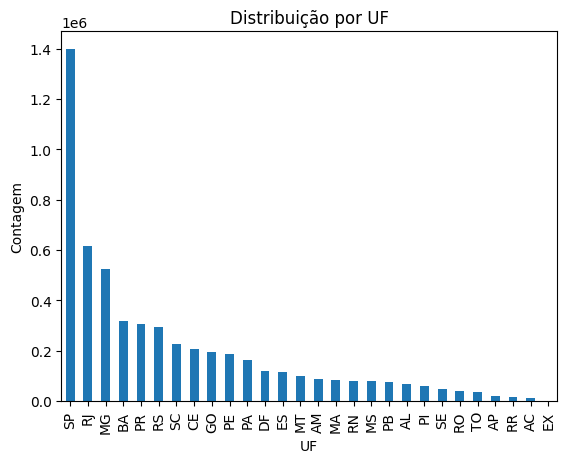

In [11]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de barras
cnpjs_1['sigla_uf'].value_counts().plot(kind='bar')
plt.title("Distribuição por UF")
plt.xlabel("UF")
plt.ylabel("Contagem")
plt.show()

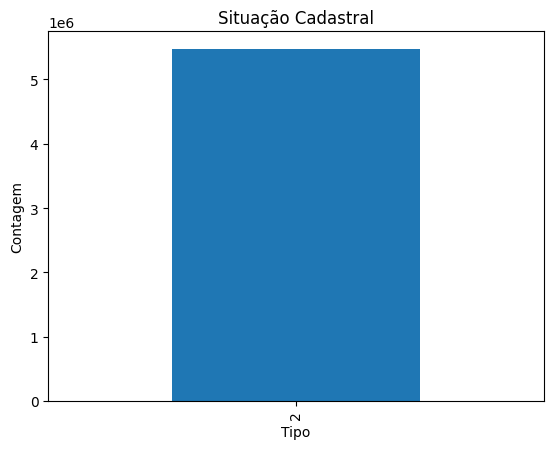

In [12]:
# Exemplo de gráfico de barras
cnpjs_1['situacao_cadastral'].value_counts().plot(kind='bar')
plt.title("Situação Cadastral")
plt.xlabel("Tipo")
plt.ylabel("Contagem")
plt.show()

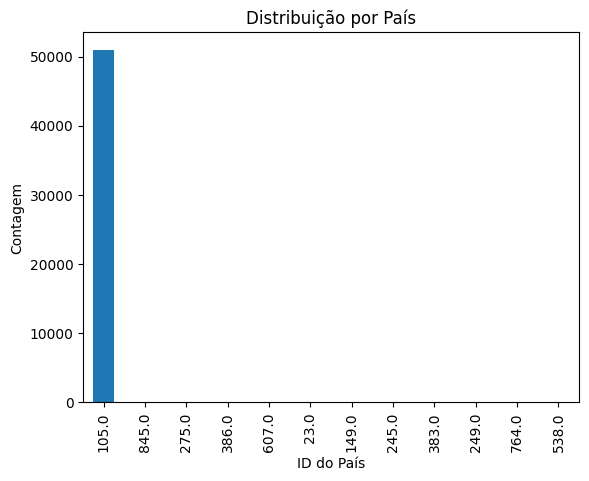

In [13]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de barras
cnpjs_1['id_pais'].value_counts().plot(kind='bar')
plt.title("Distribuição por País")
plt.xlabel("ID do País")
plt.ylabel("Contagem")
plt.show()



#dicionario dos ids dos paises

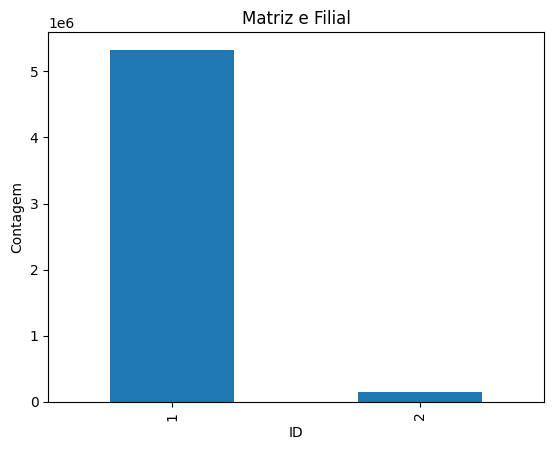

In [14]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de barras
cnpjs_1['identificador_matriz_filial'].value_counts().plot(kind='bar')
plt.title("Matriz e Filial")
plt.xlabel("ID")
plt.ylabel("Contagem")
plt.show()

In [15]:
numero_de_valores_unicos = cnpjs_1['cnpj'].nunique()

print(f"O número de valores únicos na coluna 'cnpj' é: {numero_de_valores_unicos}")

O número de valores únicos na coluna 'cnpj' é: 515874
